In [1]:
#----This script is written by Huiling Zou for AWI summer school, 26/08/2022----
#----Aims to reproduce the Fig.1 in the Gaursaud et al., 2021               ----
#----https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020GL091412  ----
#----ΔZ, Climatology of ΔSAT(surface air temperature) and ΔP(Precipitation) ----

Ensure you installed the following two packages to your conda environment

conda install -c conda-forge proplot    ###### install proplot  
conda install -c conda-forge iris       ###### install iris

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import proplot as pplt

proplot document: https://proplot.readthedocs.io/en/latest/install.html

In [4]:
import iris
import iris.coords
import iris.coord_categorisation
import numpy as np

In [5]:
r1='/home/ollie/qigao001/finse_school/data/HadCM/' # change to your own data directory
exps=['pi','lig','l1k','l500','p500','p1k']
r2='_dszp_30yr.nc'
cubenms=['pi','lig','l1k','l500','p500','p1k']  # define the new cube to load the data from files
nm=globals()
for i in range (0,6):
    filenm=r1+exps[i]+r2  # choose the route to load each file
    nm[cubenms[i]]=iris.load(filenm,['orog','precip','temp','d18O']) # select relevant variables

In [6]:
pi

Orog (unknown),latitude,longitude
Shape,73,96
Dimension coordinates,,
latitude,x,-
longitude,-,x
Attributes,,Conventions CF-1.7
Precip (m-2.kg),latitude,longitude
Shape,73,96
Dimension coordinates,,
latitude,x,-
longitude,-,x


<font color=#0099ff size=30> 
    1. Draw Figure 1 (Δz, ΔP, ΔSAT)

In [7]:
# mask the Antarctica
mask_a=np.where(l1k[0][59:,:].data==0,0,1)
print (mask_a.shape)
mask_antat       =np.zeros([73,96])
mask_antat[59:,:]=mask_a.data
mask      =np.where(mask_antat==0,True,False)
mask

(14, 96)


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [8]:
# calculate the Δorog 
exp_fig1= [l1k,l500,lig,p500,p1k]
number   = [0,1,3,4] # skip the lig experiment
for i in number:
    exp_fig1[i][0].data=exp_fig1[i][0].data-exp_fig1[2][0].data
    exp_fig1[i][0].data.mask=mask
exp_fig1[2][0].data.mask=mask

In [9]:
# calculate ΔP
pi[1].data.mask=False
for i in exp_fig1:
    i[1].data.mask=False
    i[1].data=i[1].data-pi[1].data
    i[1].data.mask=mask

In [10]:
# calculate ΔSAT
for i in exp_fig1:
    i[2].data=(i[2]-pi[2]).data

In [11]:
lat,lon=l1k[0].coord('latitude').points,l1k[0].coord('longitude').points #get coordinates 

In [12]:
# set different ice core sites  (type latitude and longitude of each)
#    ['VK','DF','EDC','EDML','TALDICE','TD']
lon_ice = [106.48,39.40,123.21,0.04,159.11,158.43] 
lat_ice = [-78.28,-77.19,-75.06,-75.00,-72.49,-77.47]

(<matplotlib.collections.PathCollection at 0x7f88936bb490>,
 <matplotlib.collections.PathCollection at 0x7f88936de710>)

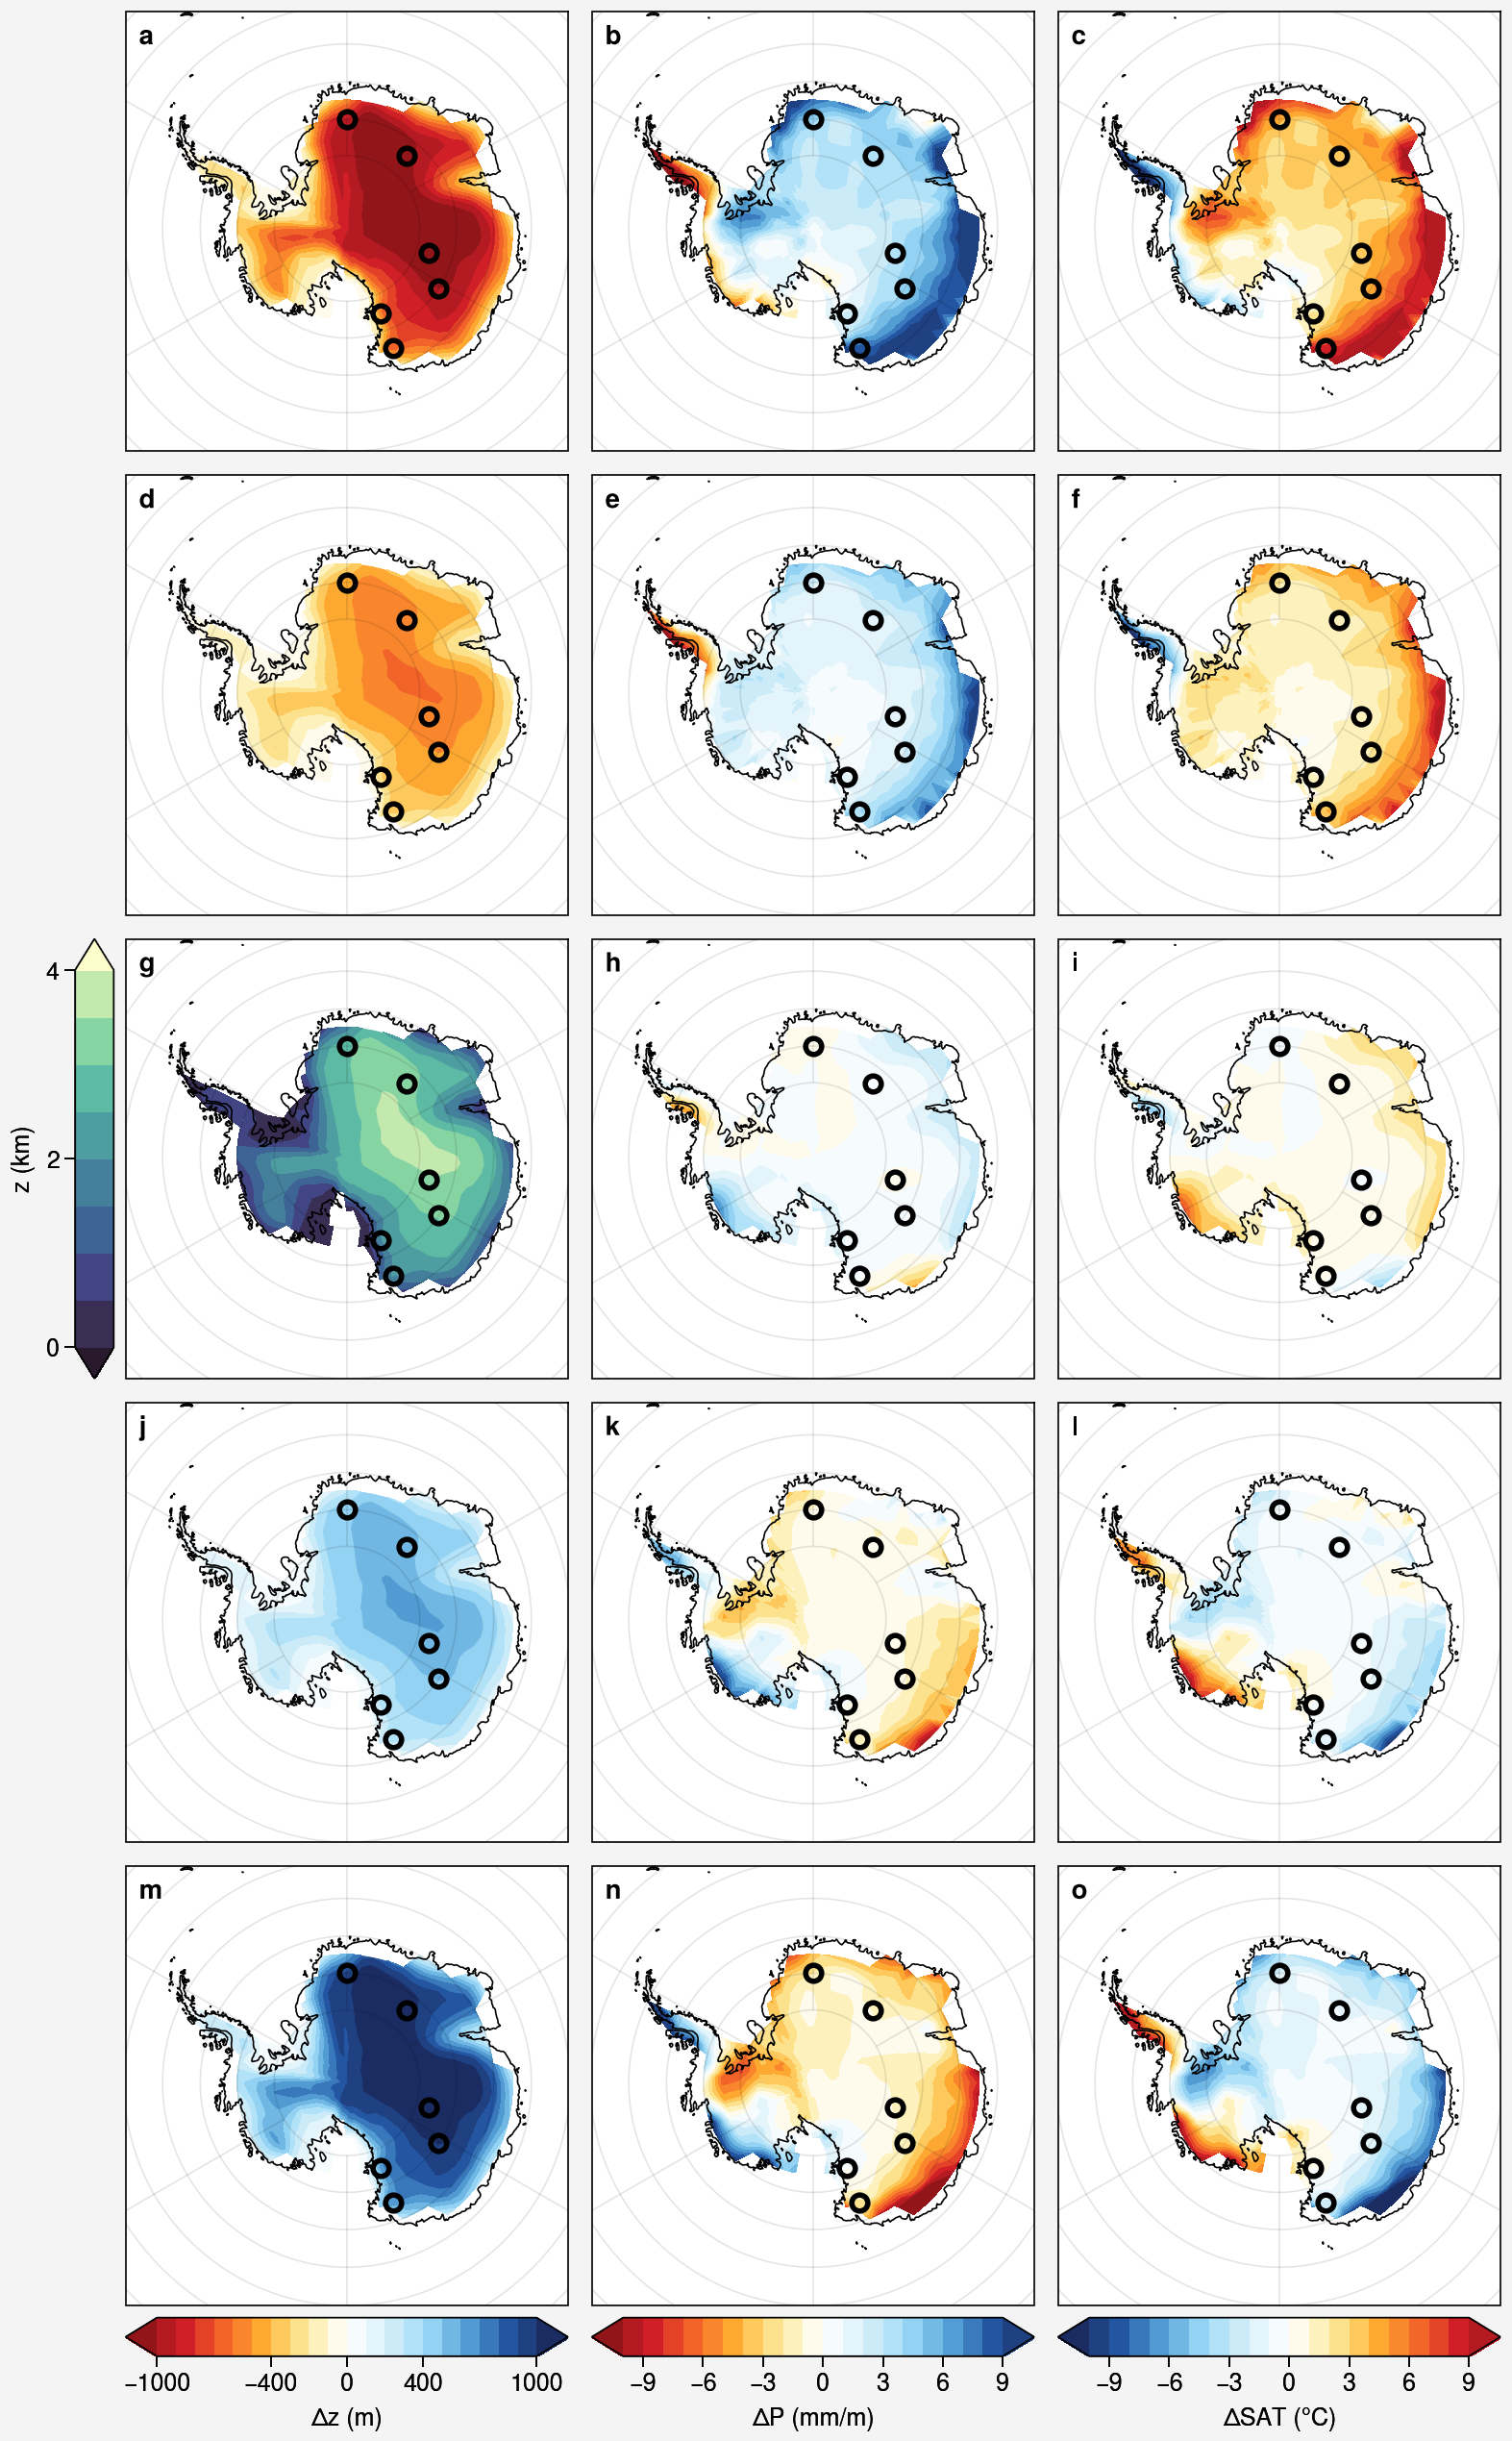

In [13]:
# ---draw the Figure 1
pplt.rc['cartopy.circular']=False #change circular boundries to the square ones
fig, axs = pplt.subplots(nrows=5,ncols=3,refwidth=2.3,proj='spstere',share=False)# set the pannel: 5 rows and 3 cols
cmap=pplt.Colormap('ColdHot',cut=-0.02) #choose a colormap
cmap_r=pplt.Colormap('ColdHot_r',cut=-0.02) #choose a colormap
cmap0=pplt.Colormap('Deep_r') #choose (g) colormap and convert the original one
norm=pplt.Norm('div')
lev0=np.arange(0,4.001,0.5)
lev1=np.arange(-1000,1001,100)
lev2=np.arange(-10,10,1) #set the level for 2nd and 3rd cols
axs.format(abc=True, abcloc='ul',boundinglat=-60) #the serial number
axs.coastlines()

#----- Δorog (ΔZ, 1st col)
c=[0,1,3,4]
for i in [0,1,3,4]: #expect (g)
    ax=axs[i*3]
    map=ax.contourf(lon,lat,exp_fig1[i][0].data,levels=lev1,extend='both',
                         cmap=cmap_r,globe=True) # extend: the shape of colorbar, change to triangle
ax.colorbar(map,loc='bottom',width=0.2,label='Δz (m)',locator=(-1000,-400,0,400,1000))

ax=axs[6] # plot (g)
map=ax.contourf(lon,lat,exp_fig1[2][0].data/1000,levels=lev0,extend='both',
                    cmap=cmap0,globe=True) # extend: the shape of colorbar, change to triangle
ax.colorbar(map,loc='left',width=0.2,label='z (km)',locator=(0,2,4))

#----- ΔP and ΔSAT
for i in range(0,5):
    t=i*3+1
    ax1=axs[t]   # plot ΔP
    ax2=axs[t+1]   # plot ΔSAT
    map1=ax1.contourf(lon,lat,exp_fig1[i][1].data,levels=lev2,extend='both',
                    cmap=cmap_r,globe=True)
    map2=ax2.contourf(lon,lat,exp_fig1[i][1].data,levels=lev2,extend='both',
                    cmap=cmap,globe=True)
ax1.colorbar(map1,loc='bottom',width=0.2,label='ΔP (mm/m)')
ax2.colorbar(map2,loc='bottom',width=0.2,label='ΔSAT (°C)')

axs.scatter(lon_ice,lat_ice,marker='o', c='none',edgecolor='black',linewidth=2)

# fig.save('4orogs_lig_pi_3*5-9.png',dpi=600)

<font color=#0099ff size=30> 
    2. Draw Figure 2 (Δd18O)

In [14]:
#---Δd18O
exp_fig2= [lig,l500,p500,l1k,p1k]
for i in exp_fig2:
    i[3].data=(i[3]-pi[3]).data

Saved colormap to '/home/ollie/qigao001/.config/proplot/cmaps/CH_bright.json'.


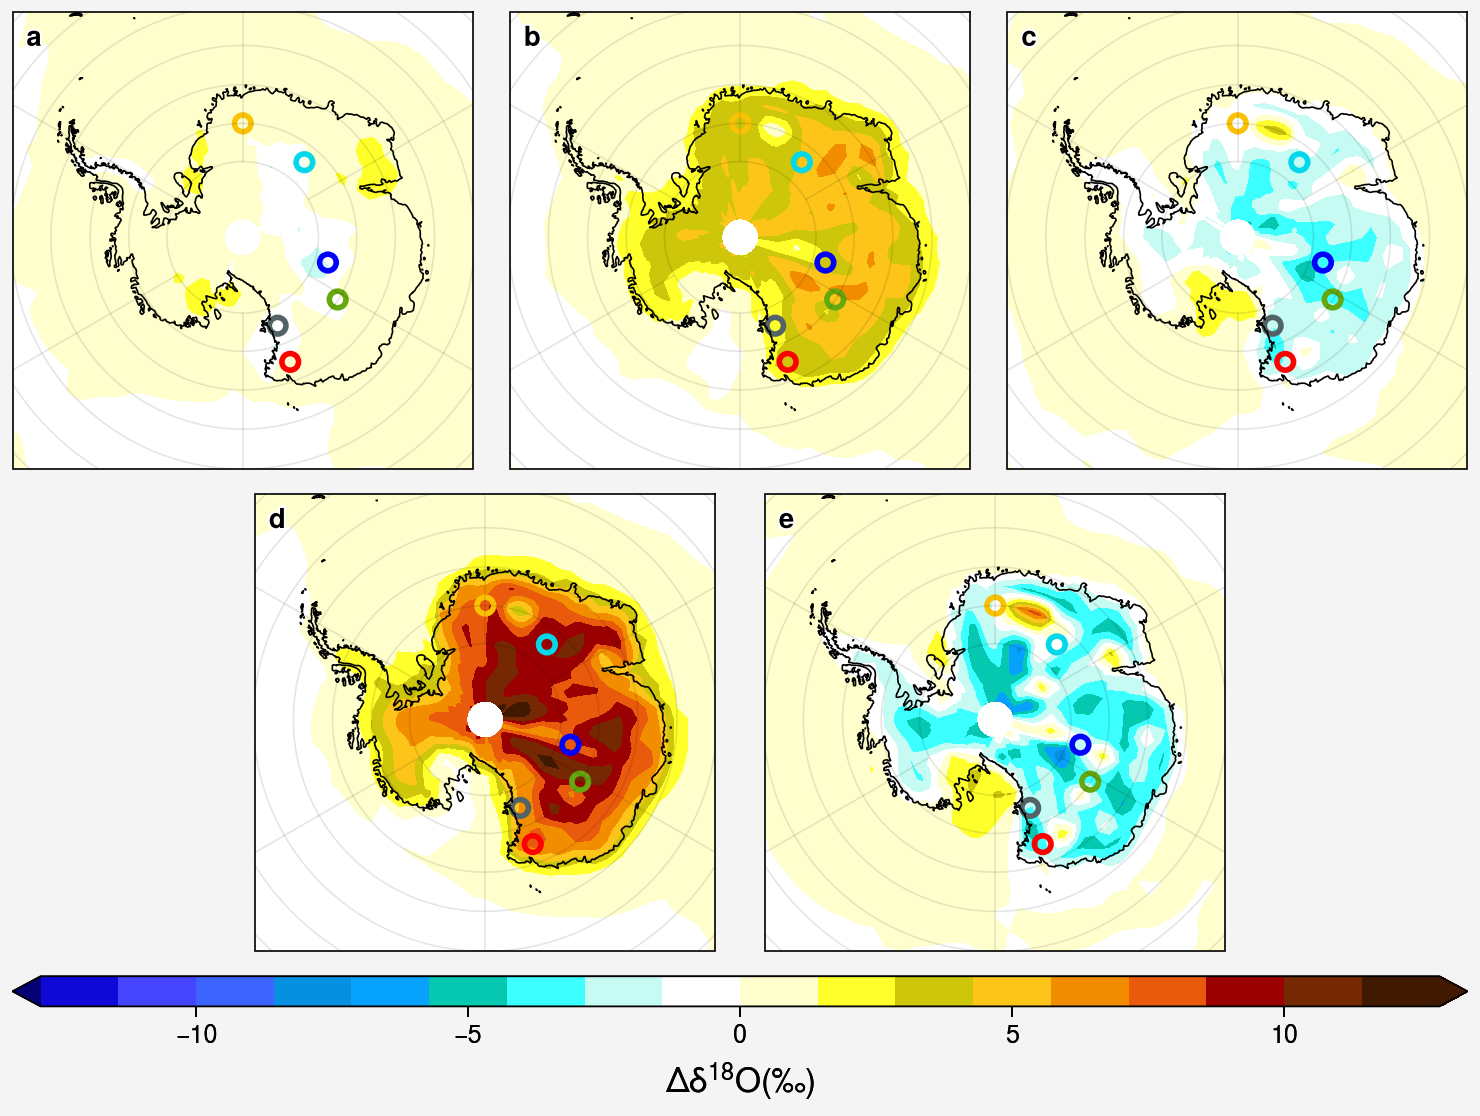

In [15]:
pplt.rc['cartopy.circular']=False #change circular boundries to the square ones
fig, axs = pplt.subplots([[1,1,2,2,3,3],[0,4,4,5,5,0]]
                         ,refwidth=2.3,proj='spstere',share=False)# set the pannel: 5 rows and 3 cols
numbers=np.ones(20)
lev2=np.arange(-(10.001+20/7),(10.001+20/7),10/7)#set the level for 2nd and 3rd cols
norm=pplt.Norm('segments',levels=lev2)
cmap2=pplt.Colormap('deep blue','deep blue','blue','electric blue','cerulean','azure','turquoise',
                    'cyan','duck egg','white','ivory','yellow','dirt yellow','yellow5','yellow8',
                    'orange8','blood red','chestnut','chocolate brown','chocolate brown',
                    ratios=numbers, gamma=0.05,
                    name='CH_bright',save=True)
cols=['blue','aqua blue','lime8','goldenrod','red','gunmetal','wisteria'] # color cycle for scatter

axs.format(abc=True, abcloc='ul',boundinglat=-60) #the serial number
axs.coastlines()

for i in range (0,5):
    map2=axs[i].contourf(lon,lat,exp_fig2[i][3].data,levels=lev2,extend='both',
                    cmap=cmap2,norm=norm,globe=True)
map2.cmap.set_under('deep blue') # set the min color

axs.scatter(lon_ice,lat_ice,marker='o', c='none',edgecolor=cols,linewidth=2)

fig.colorbar(map2,loc='b',width=0.15,label='Δδ$^{18}$O(‰)',labelsize=12,
             locator=(-10,-5,0,5,10))
# fig.save('******.png',dpi=600)

<font color=#0099ff size=30> 
    3. Draw Figure 4 (lines)

In [16]:
# def a function to extract the data in each ice core site
def ice_loc_data(data):
    lat_loc=(67,67,66,66,65,67)
    lon_loc=(28,11,33,0,42,42)
    c=np.zeros(6)
    for i in range(0,6):
        x= lat_loc[i]
        y= lon_loc[i]  
        c[i]= data[x,y].data
    return(c)

def loc_extract(cubelist):
    data=np.zeros([4,6])
#     z, precip, temp, d18O=np.zeros(6),np.zeros(6),np.zeros(6),np.zeros(6)  ## dots: [exps][vars][sites]
#     lists=[z, precip, temp, d18O]  
    for i in range (0,len(cubelist)):
        data[i]=ice_loc_data(cubelist[i])
    return (data)

In [17]:
# reload the data to calculate the anomalies against PI control
r1='/home/ollie/qigao001/finse_school/data/HadCM/'
exps=['lig','l1k','l500','l200','l100','p100','p200','p500','p1k']
r2='_dszp_30yr.nc'
cubenms=['lig','l1k','l500','l200','l100','p100','p200','p500','p1k'] # define the new cube to load the data from files
nm=globals()
for i in range (0,9):
    filenm=r1+exps[i]+r2  # choose the route to load each file
    nm[cubenms[i]]=iris.load(filenm,['orog','precip','temp','d18O']) # select the several variables

In [18]:
p200

Orog (unknown),latitude,longitude
Shape,73,96
Dimension coordinates,,
latitude,x,-
longitude,-,x
Attributes,,Conventions CF-1.7
Precip (m-2.kg),latitude,longitude
Shape,73,96
Dimension coordinates,,
latitude,x,-
longitude,-,x


In [19]:
# calculate the ΔSAT, Δd18O
exp_fig4= [lig,l1k,l500,l200,l100,p100,p200,p500,p1k]
var=[2,3]
for i in range (1,9): # i is exp name, j is variable name
    for j in var:
        exp_fig4[i][j].data=exp_fig4[i][j].data-exp_fig4[0][j].data

In [20]:
# calculate the ΔP/P(ref)
exp_fig4[0][1].data.mask=False
for i in range (1,9):
    j=1
    exp_fig4[i][j].data.mask=False
    exp_fig4[i][j].data=(exp_fig4[i][j].data-exp_fig4[0][j].data)/exp_fig4[0][j].data*100
    

In [21]:
nw_lists=['l1k_dots','l500_dots','l200_dots','l100_dots',  # create variable names to save data
          'p100_dots','p200_dots','p500_dots','p1k_dots']
dots=np.zeros([8,4,6])
for i in range (0,8):
    nm[nw_lists[i]]=loc_extract(exp_fig4[i+1])
    dots[i]=nm[nw_lists[i]]                    # dots: [exps][vars][sites]

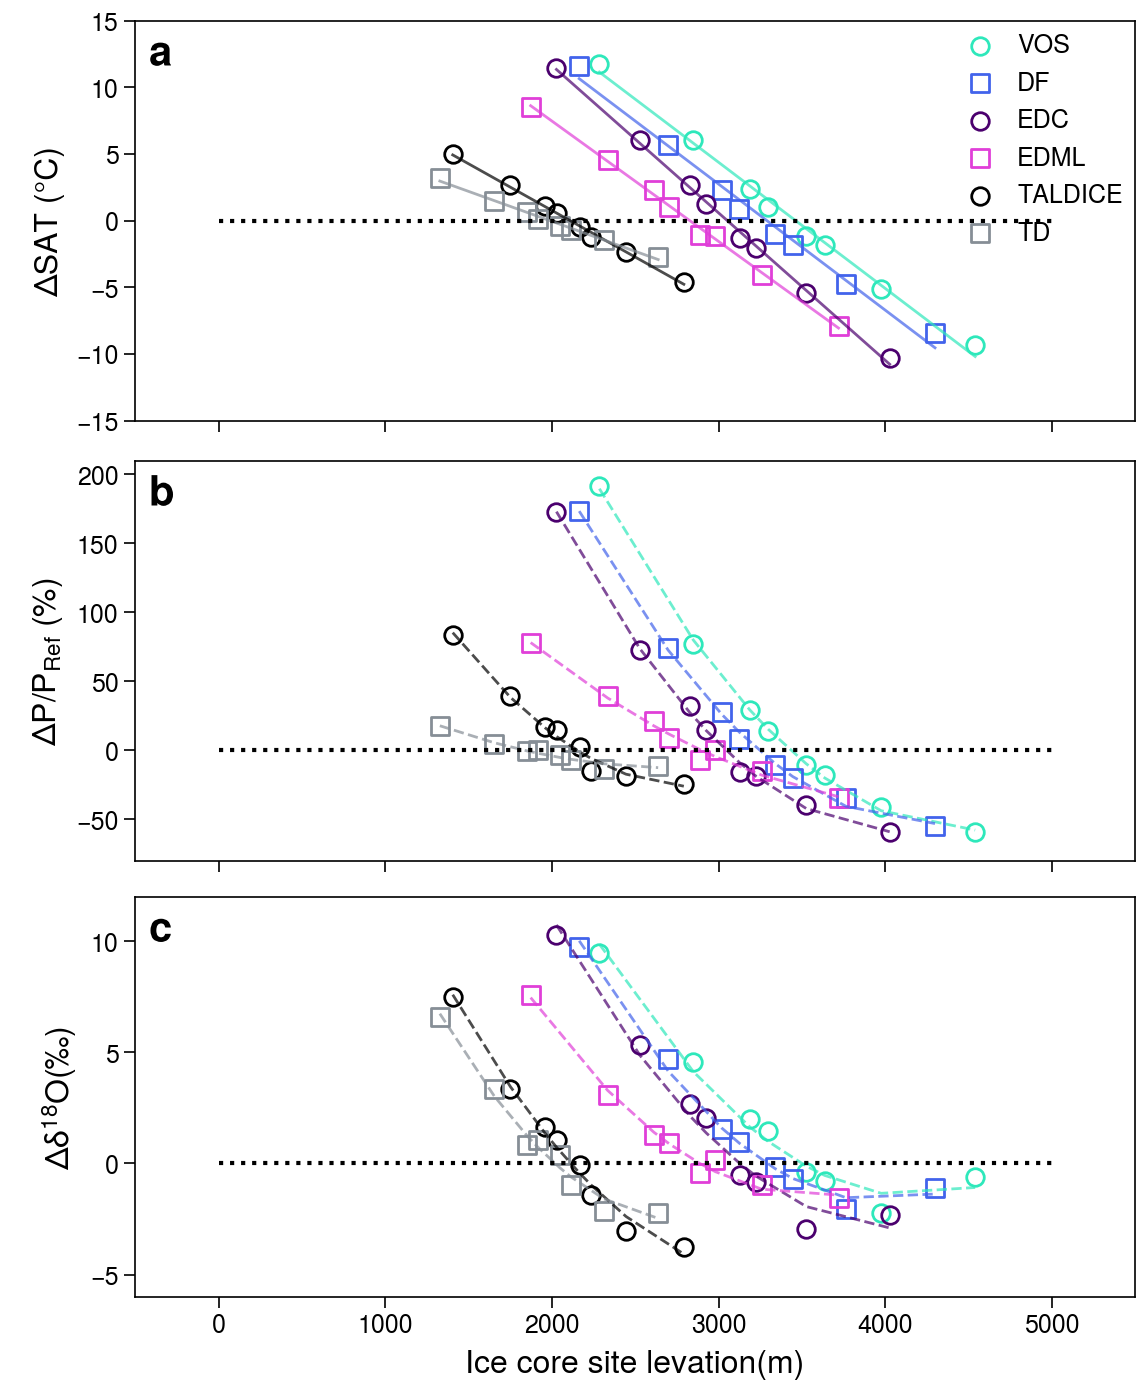

In [22]:
#--- scatter plots
cols=['aqua marine','indigo7','royal purple','purple pink','black','gray6']
strings=['VOS','DF','EDC','EDML','TALDICE','TD']
exps=['ΔSAT (°C)','ΔP/P$_{Ref}$ (%)','Δδ$^{18}$O(‰)']
markers=['o','s','o','s','o','s']
fig,axes=pplt.subplots(nrows=3,ncols=1,refwidth=5,refheight=2,share=False,sharex=True,facecolor='none')
c,y=np.arange(0,6000,1000),np.zeros(6)
lev0=np.arange(-4,4,1)
lev1=np.arange(-50,150,50)
var_order=[2,1,3]
polyfit_nb=[1,2,2]
lines=['-','--','--']

for m in range (0,3): # sat,pre,dO18
    ax=axes[m]
    var=var_order[m]
    p=polyfit_nb[m]
#     ax.set_ylabel(exps[m])
    ax.format(ylabel=exps[m],labelsize=11.5)
    for i in range (0,6): # ice core site
        for j in range(0,8): # different experiments
            x=dots[j][0][i]
            t=dots[j][var][i]
            ax.scatter(x,t,marker=markers[i],ms=40,c='none',edgecolor=cols[i],lw=1,
                       label=strings[i]if j == 0 else "")
        x0=dots[:,0,i]
        y0=dots[:,var,i]
        if p==1:
            parameter = np.polyfit(x0,y0,p)
            y2=parameter[1]+parameter[0]*x0
        else:
            parameter = np.polyfit(x0,y0,p)
            y2=parameter[2]+parameter[1]*x0+parameter[0]*x0*x0
        ax.plot(x0,y2,c=cols[i],alpha=0.7,lw=1,linestyle=lines[m])  
axes[0].format(ylim=(-15,15))
axes[0].legend(loc='ur',ncols=1,frame=False)
axes[1].format(ylim=(-80,210))
axes[2].format(ylim=(-6,12))

# axes.axhline(y=0, color='black', linestyle=':',lw=1.5)
axes.plot(c,y,color='black', linestyle=':',lw=1.5)
axes.format(abc=True, abcloc='ul',abcsize=15,xlim=(-500,5500),xlabel='Ice core site levation(m)',
            xlabelsize=11.5,xtickminor=False,
            xlocator=(0,1000,2000,3000,4000,5000),ytickminor=False,
            grid='off')
# fig.save('******.png',dpi=600)